In [2]:
import os
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_tv = pd.read_csv('data/tv_publisher.csv')

In [4]:
df_tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827133 entries, 0 to 5827132
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   device_id        object 
 1   timestamp_utc    object 
 2   cost_milli_cent  float64
dtypes: float64(1), object(2)
memory usage: 133.4+ MB


In [9]:
df_tv.head()

,device_id,timestamp_utc,cost_milli_cent,date
0,ctv81YlbBXho,2024-04-23 21:09:46,2325.51,2024-04-23
1,ctvWr7bOO5Je,2024-04-19 18:31:30,2325.51,2024-04-19
2,ctvktBqDUgcV,2024-05-07 23:32:37,2325.51,2024-05-07
3,ctv4bFFpBJms,2024-06-28 00:10:10,2325.51,2024-06-28
4,ctvFZB9pUMZ7,2024-05-24 03:45:45,2325.51,2024-05-24


In [7]:
for col in df_tv.columns:
    print(f"\n📌 Unique values in '{col}':")
    print(df_tv[col].unique())



📌 Unique values in 'device_id':
['ctv81YlbBXho' 'ctvWr7bOO5Je' 'ctvktBqDUgcV' ... 'ctvyq3Mv8Wyi'
 'ctvAxmMKz1Po' 'ctv4IsWGzGJ9']

📌 Unique values in 'timestamp_utc':
['2024-04-23 21:09:46' '2024-04-19 18:31:30' '2024-05-07 23:32:37' ...
 '2024-03-07 08:52:58' '2024-05-06 21:13:21' '2024-05-08 02:06:55']

📌 Unique values in 'cost_milli_cent':
[2325.51 2646.51]


In [8]:
df_tv['timestamp_utc'] = pd.to_datetime(df_tv['timestamp_utc'])
df_tv['date'] = df_tv['timestamp_utc'].dt.date

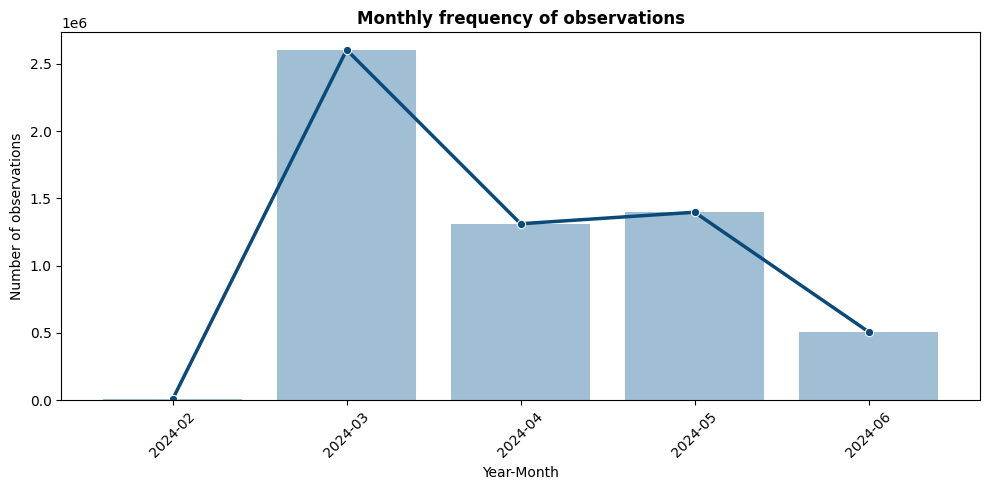

In [18]:
monthly_frequency = (
    df_tv
    .groupby('year_month')
    .size()
    .reset_index(name='count')
)

# FIX: convert Period[M] to string
monthly_frequency['year_month'] = monthly_frequency['year_month'].astype(str)

plt.figure(figsize=(10, 5))

sns.barplot(
    data=monthly_frequency,
    x='year_month',
    y='count',
    color="#7EB0D5",
    alpha=0.8
)

sns.lineplot(
    data=monthly_frequency,
    x='year_month',
    y='count',
    color="#0A4A7A",
    marker='o',
    linewidth=2.5
)

plt.xticks(rotation=45)
plt.xlabel("Year-Month")
plt.ylabel("Number of observations")
plt.title("Monthly frequency of observations", weight="bold")

plt.tight_layout()
plt.show()


I MUST ADD HOW MUCH TV_PUBLISHER HAD COST EVERY MONTH 